In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import scipy.io as sio
import pandas as pd
import numpy as np
import os

#Import functions from utils.py
from utils import save_fig
from utils import plot_dataset
from utils import plot_clusters
from utils import find_closest_centroids
from utils import compute_centroids
from utils import initialize_centroids
from utils import compute_distortion
from utils import kmeans_model
from utils import L2

np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# load the preprocessed iris dataset
dataset = pd.read_csv('datasets/iris_process.data',
                      delimiter=',',
                      header=None, 
                      names=['sepal length', 'sepal width', 'petal length', 'petal width','class'])

print('\nNumber of records:',len(dataset))
print('\nclass domain:', dataset['class'].unique())
print('\n\n',dataset.head())


Number of records: 150

class domain: [0 1]


    sepal length  sepal width  petal length  petal width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [3]:
X = pd.DataFrame(dataset,columns=['sepal length','sepal width']).values
print('The shape of X:',X.shape)

The shape of X: (150, 2)


Saving figure kmeans_datapoints


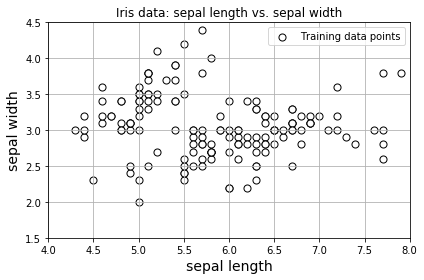

In [4]:
plt.figure(1)
plt.title('Iris data: sepal length vs. sepal width')
plot_dataset(X)
plt.axis([4.0,8.0,1.5,4.5])
plt.legend()
save_fig("kmeans_datapoints")
plt.show()

In [5]:
# Settings for running K-Means
K = 2; # Number of clusters
max_iters = 8;
initial_centroids = initialize_centroids(X, K)

In [6]:
centroids, idx = kmeans_model(X, initial_centroids, max_iters)

K-Means iteration 1/8...

K-Means iteration 2/8...

K-Means iteration 3/8...

K-Means iteration 4/8...

K-Means iteration 5/8...

K-Means iteration 6/8...

K-Means iteration 7/8...

K-Means iteration 8/8...


K-Means Done.


Saving figure kmeans_clusters


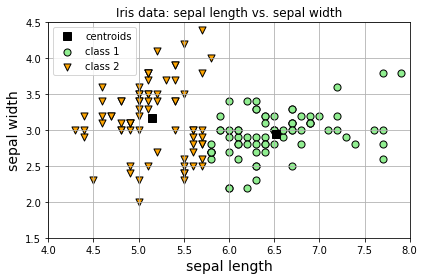

In [7]:
plt.figure(2)
plt.title('Iris data: sepal length vs. sepal width')
plot_clusters(X,idx)
plt.plot(centroids[:,0], centroids[:,1], 's',color='black',markersize=8,label="centroids")
plt.axis([4.0,8.0,1.5,4.5])
plt.legend()
save_fig("kmeans_clusters")
plt.show()

In [8]:
distortion = compute_distortion(X,idx,centroids)
print("KMeans distortion: %.3f"%(distortion))

KMeans distortion: 58.263
